In [1]:
import argparse
import numpy as np
import skimage as sk
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from columGrowing import *
from util import *

In [2]:
folder = "./dataset"
originals, filenames = load_images_from_folder(folder, return_filenames=True)
masks = []
dilate_kernel = sk.morphology.disk(1)
#dilate_kernel_two = sk.morphology.disk(2)
dilate_kernel_two = sk.morphology.disk(1)
erode_kernel = np.ones((1,4), np.uint8)
ax = -1
for original in originals:
    print(f"Processing image {len(masks)+1}/{len(originals)}...", end="\r")
    image = original.copy()
    image = ycbcr_filter(image)[0]
    image = gaussian_filter(image, 2.4)
    image = canny_filter(image, 1,30,80)
    image = convex_hull(image)
    masks.append(image)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\convhull.cpp:143: error: (-215:Assertion failed) total >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::convexHull'


In [ ]:
classifier = GaussianNB()

feature_selector = SelectKBest(k='all')

classifier = Pipeline([('feature_selector', feature_selector), ('naive_bayes', classifier)])

In [ ]:
final = []
labels = []
i=0
folder = "./saved"

image, filename = load_images_from_folder(folder, return_filenames=True)

for image, filename in zip(image, filenames):
    res = []
    if (original is not None) and (image is not None) and (filename is not None):
        #im = original[:,:,0] & mask
        im = image
        mu = sk.measure.moments_central(im)
        nu = sk.measure.moments_normalized(mu)
        hu_moments = sk.measure.moments_hu(nu)

        label = filename.split('.')[0].split("-")[2] 
        labels.append(label)

        area = getArea(im)
        perimeter = getPerimeter(im)
        area_over_perimeter = area/(perimeter**2)
        
        res = np.append(res,hu_moments)
        res = np.append(res,area_over_perimeter)

        final.append(res)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final, labels, test_size = 0.35)

print(X_test[0])

[4.15809772e-03 1.66230249e-05 4.82439189e-09 4.22723181e-09
 1.90899745e-17 1.72349365e-11 7.84767610e-21 2.60083284e-02]


In [ ]:
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(f"Accuracy {accuracy_score(y_test, y_pred)*100}")

Accuracy 27.027027027027028


ValueError: The number of FixedLocator locations (12), usually from a call to set_ticks, does not match the number of ticklabels (13).

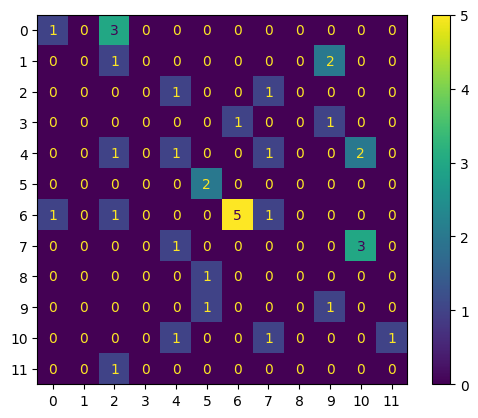

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)
cm_display.plot()
plt.show()